In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

## Loading data from keras library

In [3]:
pip install tensorflow

  Using cached tensorflow-2.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached libclang-15.0.6.1-py2.py3-none-manylinux2010_x86_64.whl (21.5 MB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached wrapt-1.14.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (81 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.51.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorflow_io_gcs_filesystem-0.30.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)


In [4]:
from keras.datasets import boston_housing

2023-01-24 12:29:56.947540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-24 12:29:57.298917: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-24 12:29:57.299017: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-24 12:29:59.000915: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("Admission_Predict.csv")

In [7]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
data.shape

(400, 9)

In [9]:
x = data[data.columns[1:-1]]
print(x)
y = data[data.columns[-1]]
print(y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396 

In [10]:
from sklearn.model_selection import train_test_split
xb,xb_v,yb,yb_v = train_test_split(x,y,shuffle=True)
xb.shape,xb_v.shape,yb.shape,yb_v.shape

((300, 7), (100, 7), (300,), (100,))

In [11]:
(xb,yb),(xb_v,yb_v) = boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

In [12]:
xb

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [13]:
import numpy as np
import pandas as pd

In [14]:
df_xb = pd.DataFrame(xb)
df_xb_v = pd.DataFrame(xb_v)




In [15]:
df_xb.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(-1, 1))
#normalised_data = scaler.fit_transform(df)

#scaler = StandardScaler()
xb = scaler.fit_transform(xb)
xb_v = scaler.fit_transform(xb_v)
yb =  ((yb - np.min(yb)) / (np.max(yb) - np.min(yb)))*2-1
yb_v =  ((yb_v - np.min(yb_v)) / (np.max(yb_v) - np.min(yb_v)))*2-1
yb,yb_v

(array([-0.54666667,  0.65777778,  1.        , -0.28444444, -0.43555556,
        -0.4       , -0.72      , -0.52888889, -0.52888889, -0.58222222,
        -0.68444444, -0.42666667, -0.19555556, -0.33777778, -0.52444444,
        -0.83111111,  1.        , -0.22222222, -0.15111111,  0.        ,
        -0.73777778,  0.14666667,  0.24      , -0.15555556, -0.4       ,
        -0.63111111, -0.20444444,  0.32      , -0.48444444, -0.44444444,
        -0.23111111, -0.50666667, -0.56      , -0.19555556,  0.32888889,
        -0.11111111, -0.60444444, -0.64      , -0.31555556, -0.33333333,
        -0.54666667, -0.12444444, -0.23555556, -0.48      , -0.65777778,
        -0.52888889, -0.40444444, -0.28888889,  0.11555556, -0.55111111,
        -0.39111111, -0.79555556,  0.17777778, -0.12      , -0.37333333,
        -0.24444444, -0.57777778, -0.73333333,  0.2       ,  0.08444444,
        -0.32      , -0.13777778, -0.57333333, -0.35555556, -0.59555556,
        -0.58666667, -0.52888889, -0.75555556, -0.9

In [18]:
yb

array([-0.54666667,  0.65777778,  1.        , -0.28444444, -0.43555556,
       -0.4       , -0.72      , -0.52888889, -0.52888889, -0.58222222,
       -0.68444444, -0.42666667, -0.19555556, -0.33777778, -0.52444444,
       -0.83111111,  1.        , -0.22222222, -0.15111111,  0.        ,
       -0.73777778,  0.14666667,  0.24      , -0.15555556, -0.4       ,
       -0.63111111, -0.20444444,  0.32      , -0.48444444, -0.44444444,
       -0.23111111, -0.50666667, -0.56      , -0.19555556,  0.32888889,
       -0.11111111, -0.60444444, -0.64      , -0.31555556, -0.33333333,
       -0.54666667, -0.12444444, -0.23555556, -0.48      , -0.65777778,
       -0.52888889, -0.40444444, -0.28888889,  0.11555556, -0.55111111,
       -0.39111111, -0.79555556,  0.17777778, -0.12      , -0.37333333,
       -0.24444444, -0.57777778, -0.73333333,  0.2       ,  0.08444444,
       -0.32      , -0.13777778, -0.57333333, -0.35555556, -0.59555556,
       -0.58666667, -0.52888889, -0.75555556, -0.94222222, -0.36

## PCA 

In [19]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

# Randomization
import random

In [20]:
pca = PCA(n_components=4)
pca.fit(xb)
xb_pca = pca.transform(xb)

pca.fit(xb_v)
pca.fit(xb_v)
xb_v_pca = pca.transform(xb_v)

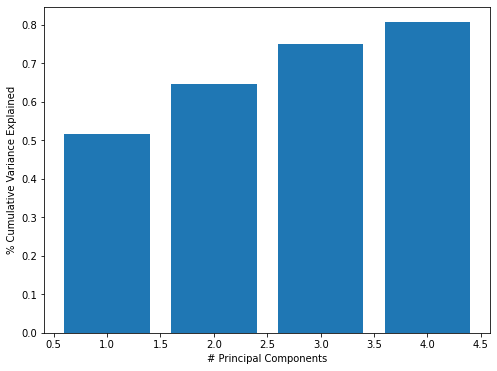

In [21]:
# Calculate cumulative explained variance across all PCs

cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,5), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [22]:
xb_pca.shape,yb.shape,xb_v_pca.shape,yb_v.shape

((404, 4), (404,), (102, 4), (102,))

In [23]:
yb.reshape()

Traceback (most recent call last):
  Input In [23] in <cell line: 1>
    yb.reshape()
TypeError: reshape() takes exactly 1 argument (0 given)

Use %tb to get the full traceback.


## Encoding

In [28]:
feature_map = ZFeatureMap(4)

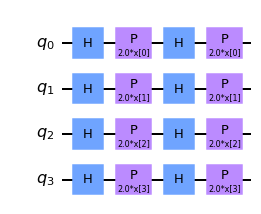

In [29]:
feature_map.decompose().draw()

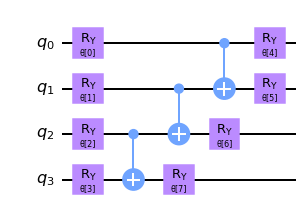

In [31]:
ansatz = RealAmplitudes(4,reps=1)
ansatz.decompose().draw()

In [32]:
# construct simple feature map
#param_x = Parameter("x")
#feature_map = ZZFeatureMap(4)
#feature_map = RealAmplitudes(4,reps=1,insert_barriers=True,entanglement=[[0,1]])


#feature_map = QuantumCircuit(4, name="fm")
#feature_map.rx(param_x[0], 0)
#feature_map.ry(param_x[0], 0)

#feature_map.rx(param_x[1], 1)
#feature_map.ry(param_x[1], 1)

#feature_map.rx(param_x[2], 2)
#feature_map.ry(param_x[2], 2)

#feature_map.rx(param_x[3], 3)
#feature_map.ry(param_x[3], 3)

# construct simple ansatz
#param_y = Parameter("y")
#ansatz = RealAmplitudes(4,reps=1,insert_barriers=True,entanglement=[[0,1]])
#ansatz = QuantumCircuit(4, name="vf")
#ansatz.ry(param_y, 0)
#ansatz.ry(param_y, 1)

# construct a circuit
qc = QuantumCircuit(4)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

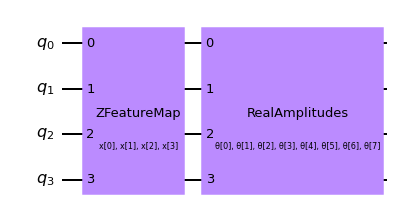

In [33]:
qc.draw()

In [ ]:
from qiskit_machine_learning im

In [34]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    #print(obj_func_eval)

In [35]:
from qiskit.algorithms.optimizers import ADAM

In [45]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=COBYLA(maxiter=50),
    #optimizer=ADAM(maxiter=5),
    callback=callback_graph,
)

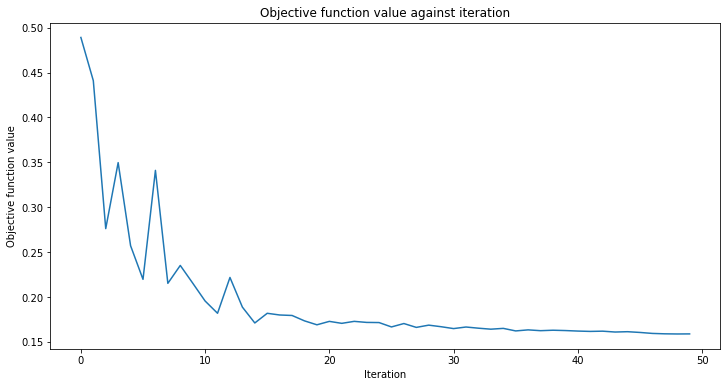

0.08760931064585631

In [46]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(xb_pca, yb)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(xb_v_pca, yb_v)

In [47]:
# plot target function
#f = lambda x: np.sin(x)
#plt.plot(xb_v_pca, f(xb_v_pca), "r--")

# plot data
#plt.plot(xb_v_pca, yb_v, "bo")

# plot fitted line
y_ = regressor.predict(xb_v_pca)
#plt.plot(xb_v_pca, y_, "g-")
#plt.show()
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

print(mse_loss(y_,yb_v))
y_[:5],yb_v[:5]
#df = pd.DataFrame([y_,yb_v])
#df


18.26325703542766


(array([[-0.09536405],
        [-0.1345235 ],
        [-0.3359718 ],
        [-0.08966169],
        [-0.31002474]]),
 array([-0.92792793, -0.40540541, -0.3963964 , -0.03603604, -0.25225225]))

In [48]:
max(y_),min(y_),max(yb_v),min(yb_v)

(array([0.16219589]), array([-0.39548309]), 1.0, -1.0)

In [49]:
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=50),
    callback=callback_graph,
)

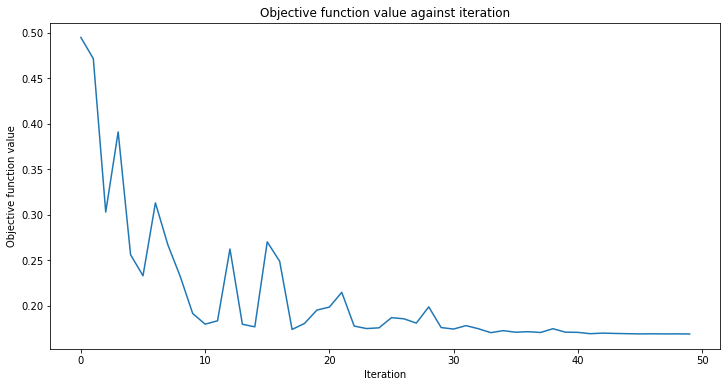

-0.009796501429949922

In [50]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(xb_pca, yb)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score result
vqr.score(xb_pca, yb)

In [51]:
# plot target function
#f = lambda x: np.sin(x)
#plt.plot(xb_v_pca, f(xb_v_pca), "r--")

# plot data
#plt.plot(xb_v_pca, yb_v, "bo")

# plot fitted line
y_ = vqr.predict(xb_v_pca)
#plt.plot(xb_v_pca, y_, "g-")
#plt.show()
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

print("Mean square error:",mse_loss(y_,yb_v))
print("Actual values:",yb_v[:5])
print("Predicted values:",y_[:5].tolist())
#df = pd.DataFrame([y_,yb_v])
#df


Mean square error: 19.870899914385276
Actual values: [-0.92792793 -0.40540541 -0.3963964  -0.03603604 -0.25225225]
Predicted values: [[0.021251421259161615], [-0.17173011497104054], [-0.08941052104991704], [-0.1438337405235883], [-0.14673393320913292]]


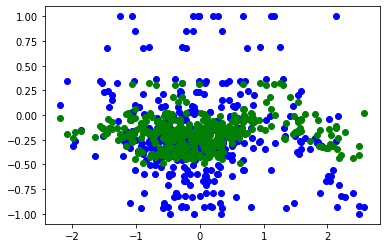

In [52]:
# plot target function
#f = lambda x: np.sin(x)
#plt.plot(xb_v_pca, f(xb_v_pca), "r--")

# plot data
plt.plot(xb_v_pca, yb_v, "bo")

# plot fitted line
y_ = vqr.predict(xb_v_pca)
plt.plot(xb_v_pca, y_, "go")
plt.show()

In [53]:
print(y_[:5],yb_v[:5])

[[ 0.02125142]
 [-0.17173011]
 [-0.08941052]
 [-0.14383374]
 [-0.14673393]] [-0.92792793 -0.40540541 -0.3963964  -0.03603604 -0.25225225]
